# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress, pearsonr

# Import API key
from api_keys import weather_api_key
units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
ids = []
cit = []
cloudi = []
country = []
date = []
hum = []
lati = []
longi = []
temp = []
windspe = []

count = 0+1

query_url= f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city.replace(" ","&")).json()
    try:
        ids.append(response['id'])
        cit.append(response['name'])
        cloudi.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        lati.append(response['coord']['lat'])
        longi.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        windspe.append(response['wind']['speed'])
    except KeyError:
        print(f"Processing Record {count} of Set {1} | {city}")

Processing Record 1 of Set 1 | taolanaro
Processing Record 1 of Set 1 | barbar
Processing Record 1 of Set 1 | samusu
Processing Record 1 of Set 1 | tabiauea
Processing Record 1 of Set 1 | nyzhnya krynka
Processing Record 1 of Set 1 | luang prabang
Processing Record 1 of Set 1 | tawkar
Processing Record 1 of Set 1 | vaitupu
Processing Record 1 of Set 1 | malwan
Processing Record 1 of Set 1 | nizhneyansk
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 1 of Set 1 | rungata
Processing Record 1 of Set 1 | saleaula
Processing Record 1 of Set 1 | utiroa
Processing Record 1 of Set 1 | stoyba
Processing Record 1 of Set 1 | el dorado
Processing Record 1 of Set 1 | illoqqortoormiut
Processing Record 1 of Set 1 | meyungs
Processing Record 1 of Set 1 | saint george
Processing Record 1 of Set 1 | walvis bay
Processing Record 1 of Set 1 | kamenskoye
Processing Record 1 of Set 1 | marcona
Processing Record 1 of Set 1 | jinchengjiang
Processing Record 1 of Set 1 | we
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
weather_df = pd.DataFrame({
'City_ID': ids,
'City': cit,
'Country': country,
'Cloudiness': cloudi,
'Date': date,
'Humidity': hum,
'Lat': lati,
'Lng': longi,
'Max Temp': temp,
'Wind Speed': windspe
})
weather_df

,City_ID,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,546105,Nikolskoye,RU,20,1595387404,82,59.70,30.79,62.01,8.95
1,5150651,Clyde,US,75,1595387405,82,41.30,-82.98,75.99,1.01
2,6322152,Arraial,BR,0,1595387405,59,-22.84,-46.65,64.40,6.93
3,1692429,Punta,PH,63,1595387406,62,8.99,125.34,87.01,2.77
4,4030556,Rikitea,PF,0,1595387407,62,-23.12,-134.97,66.31,17.92
...,...,...,...,...,...,...,...,...,...,...
553,654899,Kajaani,FI,75,1595387835,93,64.23,27.73,62.60,5.82
554,1090415,Chirongui,YT,90,1595387836,65,-12.93,45.15,77.00,20.80
555,1506268,Gornopravdinsk,RU,8,1595387836,55,60.05,69.90,67.33,4.18
556,1178338,Gilgit,PK,24,1595387837,42,35.92,74.31,68.79,1.19


In [52]:
weather_df.count()

City_ID       558
City          558
Country       558
Cloudiness    558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [53]:
weather_df.head()

,City_ID,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,546105,Nikolskoye,RU,20,1595387404,82,59.70,30.79,62.01,8.95
1,5150651,Clyde,US,75,1595387405,82,41.30,-82.98,75.99,1.01
2,6322152,Arraial,BR,0,1595387405,59,-22.84,-46.65,64.40,6.93
3,1692429,Punta,PH,63,1595387406,62,8.99,125.34,87.01,2.77
4,4030556,Rikitea,PF,0,1595387407,62,-23.12,-134.97,66.31,17.92


In [37]:
#weather_df.to_csv(weather)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [54]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df['Humidity'] >100]
weather_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,5.580000e+02,558.000000,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000
mean,2.652146e+06,51.068100,1.595388e+09,72.293907,21.388943,17.268208,70.067670,7.096989
std,1.695789e+06,37.616639,1.452893e+02,18.696182,31.358892,87.174039,12.935423,4.648358
min,5.081400e+04,0.000000,1.595387e+09,3.000000,-54.800000,-179.170000,32.000000,0.510000
25%,1.508220e+06,15.000000,1.595387e+09,62.000000,-3.787500,-57.740000,60.800000,3.490000
50%,2.259832e+06,49.000000,1.595388e+09,75.000000,22.625000,20.185000,71.655000,5.940000
75%,3.576690e+06,90.000000,1.595388e+09,87.000000,46.777500,87.885000,80.600000,9.170000
max,8.079926e+06,100.000000,1.595388e+09,100.000000,78.220000,178.420000,98.740000,24.610000


In [55]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df['Humidity'] >=100].reset_index(inplace=False, drop=True)
clean_city_data

,City_ID,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3872326,Cape,CL,100,1595387417,100,-36.41,-71.90,46.40,5.82
1,3337405,East,IS,40,1595387454,100,65.00,-15.00,41.00,1.48
2,3427761,Tigre,AR,90,1595387478,100,-34.43,-58.58,57.20,3.36
3,286621,Salalah,OM,90,1595387484,100,17.02,54.09,78.80,8.05
4,5563839,Fortuna,US,90,1595387301,100,40.60,-124.16,57.99,6.93
5,3105522,Bereda,ES,97,1595387554,100,43.27,-7.54,63.00,8.99
6,4120323,Magnolia,US,98,1595387492,100,33.27,-93.24,79.00,4.09
7,737021,Zonguldak,TR,20,1595387701,100,41.25,31.83,60.80,1.12
8,5563397,Eureka,US,59,1595387484,100,40.80,-124.16,57.99,4.79
9,3894406,Coihueco,CL,20,1595387758,100,-36.62,-71.83,44.60,3.36


In [36]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

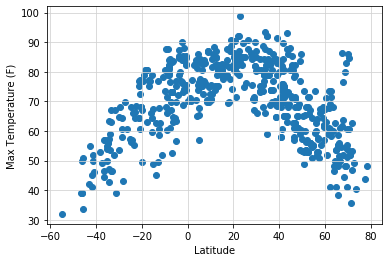

The latitutde does affect the temperature of your household.


In [66]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title=('Latitude Vs. Temperature (07/21/20)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'output_data/Latitude vs. Temperature ({date}).png')
plt.show()
print('The latitutde does affect the temperature of your household.')

## Latitude vs. Humidity Plot

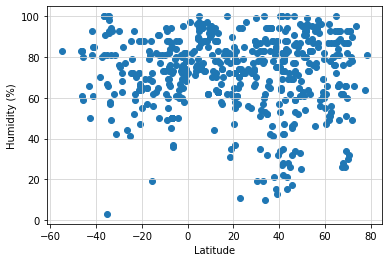

The latitude does not affect the chance of high humidity.


In [65]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title=('Latitude Vs. Humidity (07/21/20')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'output_data/Latitude vs. Humidity ({date}).png')
plt.show()
print('The latitude does not affect the chance of high humidity.')

## Latitude vs. Cloudiness Plot

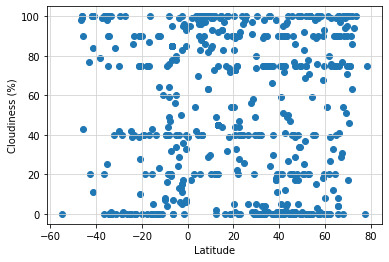

The cloudiness of a loction does not correlate with the latitude.


In [67]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title=('Latitude Vs. Cloudiness (07/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'output_data/Latitude vs. Cloudiness ({date}).png')
plt.show()
print('The cloudiness of a loction does not correlate with the latitude.')

## Latitude vs. Wind Speed Plot

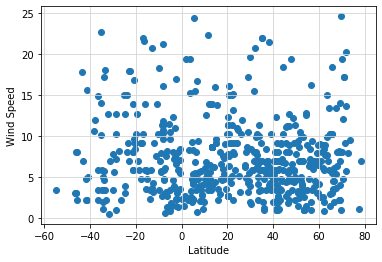

Your location(latitude) does place a vital role in windiness.


In [68]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title=('Latitude Vs. Wind Speed (07/21/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'output_data/Latitude vs. Wind Speed ({date}).png')
plt.show()
print('Your location(latitude) does place a vital role in windiness.')

## Linear Regression

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots


In [72]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df[weather_df["Lat"] >= 0]
south = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression